In [1]:
import hkvwaporpy as hkv
import pandas as pd
import datetime
from io import BytesIO
import uuid
from osgeo import gdal
import requests
from matplotlib import pyplot as plt
%matplotlib inline

#### Metadata request for available products

In [2]:
# request the catalogus
df = hkv.read_wapor.get_catalogus()
df.head()

https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/WAPOR/cubes?overview=False


,additionalInfo,caption,code,dataType,description,hidden,index,links,operation,tags,workspaceCode
0,"{'format': 'Raster Dataset', 'unit': 'kg/m³ is...",Gross Biomass Water Productivity,L1_GBWP_A,RASTER,The annual Gross Biomass Water Productivity ex...,False,101,"[{'rel': 'self', 'href': 'https://io.apps.fao....","{'pixelTimeSeries': True, 'areaStats': False}","[{'name': 'L1', 'index': 1, 'context': 'LEVELS...",WAPOR
1,"{'format': 'Raster Dataset', 'unit': 'kg/m³ is...",Net Biomass Water Productivity,L1_NBWP_A,RASTER,The annual Net Biomass Water Productivity expr...,False,102,"[{'rel': 'self', 'href': 'https://io.apps.fao....","{'pixelTimeSeries': True, 'areaStats': False}","[{'name': 'L1', 'index': 2, 'context': 'LEVELS...",WAPOR
2,"{'format': 'Raster Dataset', 'unit': 'mm', 'da...",Actual EvapoTranspiration and Interception (An...,L1_AETI_A,RASTER,The actual EvapoTranspiration and Interceptio...,False,103,"[{'rel': 'self', 'href': 'https://io.apps.fao....","{'pixelTimeSeries': True, 'areaStats': False}","[{'name': 'L1', 'index': 3, 'context': 'LEVELS...",WAPOR
3,"{'format': 'Raster Dataset', 'unit': 'mm', 'da...",Actual EvapoTranspiration and Interception (De...,L1_AETI_D,RASTER,The actual EvapoTranspiration and Interception...,False,104,"[{'rel': 'self', 'href': 'https://io.apps.fao....","{'pixelTimeSeries': True, 'areaStats': False}","[{'name': 'L1', 'index': 4, 'context': 'LEVELS...",WAPOR
4,"{'format': 'Raster Dataset', 'unit': 'mm', 'da...",Transpiration (Annual),L1_T_A,RASTER,The Transpiration (T) data component is the ac...,False,105,"[{'rel': 'self', 'href': 'https://io.apps.fao....","{'pixelTimeSeries': True, 'areaStats': False}","[{'name': 'L1', 'index': 5, 'context': 'LEVELS...",WAPOR


#### show all codes

In [3]:
df[['caption','code']]

,caption,code
0,Gross Biomass Water Productivity,L1_GBWP_A
1,Net Biomass Water Productivity,L1_NBWP_A
2,Actual EvapoTranspiration and Interception (An...,L1_AETI_A
3,Actual EvapoTranspiration and Interception (De...,L1_AETI_D
4,Transpiration (Annual),L1_T_A
5,Evaporation (Annual),L1_E_A
6,Interception (Annual),L1_I_A
7,Transpiration (Dekadal),L1_T_D
8,Evaporation (Dekadal),L1_E_D
9,Interception (Dekadal),L1_I_D


#### select product / code of interest

In [4]:
ds_code = 'L2_AETI_A'

#### get additional info of the dataset given a code and catalogus

In [5]:
cube_info = hkv.read_wapor.get_info_cube(cube_code=ds_code)
cube_info

,L2_AETI_A
format,Raster Dataset
unit,mm
dataType,Int32 (32bit Unsigned Integer)
conversionFactor,the pixel value in the downloaded data must be...
noDataValue,-9999
spatialResolution,100m (0.000992 degree)
spatialExtent,Africa and Near East
spatialReferenceSystem,EPSG:4326 - WGS84 - Geographic Coordinate Syst...
temporalResolution,from January 2009 to present
temporalExtent,Annual


In [6]:
# show the dimensions
cube_info.loc['dimensions',ds_code]

code,YEAR
caption,Year
code,YEAR
hierarchical,False
links,"[{'rel': 'self', 'href': 'https://io.apps.fao...."
timeSubtype,YEAR
type,TIME
workspaceCode,WAPOR
season,NaN
stage,NaN


In [7]:
# show the measures
cube_info.loc['measures',ds_code]

code,WATER_MM
caption,Amount of Water
code,WATER_MM
description,Amount of water expressed in mm which can be c...
links,"[{'rel': 'self', 'href': 'https://io.apps.fao...."
multiplier,0.1
scale,3
unit,mm
workspaceCode,WAPOR


#### get the data availability of the product within a set time_range

In [8]:
df_avail = hkv.read_wapor.get_data_availability(
    cube_info = cube_info, 
    time_range = '[2001-11-01, 2018-08-01]'
    )

data_avail_period: YEAR


In [9]:
df_avail.tail()

,raster_id,bbox_srid,bbox_value
year,,,
2013,L2_AETI_13,EPSG:4326,"[-17.6800595, -26.9816468, 54.5500992, 38.3308..."
2014,L2_AETI_14,EPSG:4326,"[-17.6800595, -26.9816468, 54.5500992, 38.3308..."
2015,L2_AETI_15,EPSG:4326,"[-17.6800595, -26.9816468, 54.5500992, 38.3308..."
2016,L2_AETI_16,EPSG:4326,"[-17.6800595, -26.9816468, 54.5500992, 38.3308..."
2017,L2_AETI_17,EPSG:4326,"[-17.6800595, -26.9816468, 54.5500992, 38.3308..."


#### get the locations (countries and bassins) for which data products are available

In [10]:
df_locations = hkv.read_wapor.get_locations()
df_locations.head()

,name,code,type,bbox
0,Awash,7010,BASIN,"[37.9583333333327, 7.89583333333234, 43.320833..."
1,Jordan,6006,BASIN,"[34.4249999999993, 29.4624999999998, 36.799999..."
2,Litani,6002,BASIN,"[35.2291666666659, 33.0999999999998, 36.399999..."
3,Niger,7002,BASIN,"[-11.5874999999999, 4.27083333333253, 15.85833..."
4,Nile,7003,BASIN,"[23.4458333333329, -4.0291666666674, 39.808333..."


#### set a lococation type and location code to query a certain product

In [11]:
location = df_locations.iloc[0]
loc_type = location['type']
loc_code = location['code']
print(loc_type, loc_code, location['name'])

BASIN 7010 Awash


#### set the raster id of the product to query

In [12]:
cube_period = df_avail.iloc[0]
raster_id = cube_period['raster_id']
print(raster_id)

L2_AETI_09


#### get the coverage url from where the product can be obtained. Remember that this requires a WaPOR registered email address and password to be obtained from https://wapor.apps.fao.org/sign-in

In [13]:
cov_object = hkv.read_wapor.get_coverage_url(
    email = 'user@domain.com', 
    password = 'mypassword',
    raster_id = raster_id,
    cube_code = ds_code,
    loc_type = loc_type,
    loc_code = loc_code)

In [14]:
cov_object

{'expiry_datetime': datetime.datetime(2018, 8, 28, 17, 41, 16, 125150),
 'download_url': 'https://io.apps.fao.org/gismgr/download/3d/97/1e/b2-cbf8-4189-bf49-0a6c47eb1677/L2_AETI_09_7010.tif'}

#### Please download carefully, all L1 products are at least 1 GigaByte for each coverage product

In [15]:
if cov_object['expiry_datetime'] > datetime.datetime.now():
    # url still valid
    resp = requests.get(cov_object['download_url'])

In [16]:
# load data into memory
image_data = BytesIO(resp.content)
filename = uuid.uuid4().hex
mmap_name = "/vsimem/{}".format(filename)
gdal.FileFromMemBuffer(mmap_name, image_data.read())
dataset = gdal.Open(mmap_name)

In [17]:
# get gdal info
print(gdal.Info(mmap_name))

Driver: GTiff/GeoTIFF
Files: /vsimem/79d4d2b236f4451dbe6b01673f4c3154
Size is 5406, 4529
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (37.957837282836003,12.388392873200001)
Pixel Size = (0.000992063492000,-0.000992063492000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  COMPRESSION=LZW
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  37.9578373,  12.3883929) ( 37d57'28.21"E, 12d23'18.21"N)
Lower Left  (  37.9578373,   7.8953373) ( 37d57'28.21"E,  7d53'43.21"N)
Upper Right (  43.3209325,  12.3883929) ( 43d19'15.36"E, 12d23'18.21"N)
Lower Right (  43.3209325,   7.8953373) ( 43d19'15.36"E,  7d53'43.21"N)
Center      (  40.6393849,  10.1418651) ( 40d38'21.79"E, 10d 8'30.71"N)
Band 1 Block=256x256 Type=Int32, ColorInterp=Gray
  NoDat

#### plot the result using matplotlib

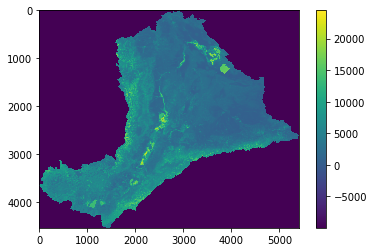

In [18]:
im = plt.imshow(dataset.ReadAsArray())
plt.colorbar(im)
plt.show()